# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lecture 5</span> *Regression I: Simple Linear Regression*
*Partly adapted from [How to be a quantitative ecologist](https://www.researchgate.net/publication/310239832_How_to_be_a_Quantitative_Ecologist_The_'A_to_R'_of_Green_Mathematics_and_Statistics) and [All of Statistics](https://www.stat.cmu.edu/~larry/all-of-statistics/)*




#### 1. Regression: Motivaion and Goals

A primary task of statistics is to separate **systematic** (signal from certain processes) from **random** (noise) patterns. Systematic patterns may offer scientific insights. Patterns unfold in space and time, so to detect them we need to collect repeated observations, possibly under different circumstances.

In previous lectures, we learned about point estimation (quantify property of a random process) and hypothesis testing (quantify differences in a categorical way). Sometimes, we want to get more information from the data. A common need is to know whether a pattern can be explained by some other pattern(s), which gives rise to **regression**, a statistical approach to estimating parameteres and the associated uncertainty of the relationship between the patterns (or variables/processes).

$Y = f(X_1, X_2, ..., X_n)$, where Y is often called *response/dependent variable*, and $X_i$ are called *explanatory/independent/predictor variable* or *feature*.


Ther term *regression* is due to Sir Francis Galton (1822-1911) who noticed that tall and short men tend to have sons with heights closer to the mean. He called this *regression towards the mean* in his work *Regression towards mediocrity in hereditary stature* (1886). Apparently, the usage of regression has gone way beyond its original meaning.

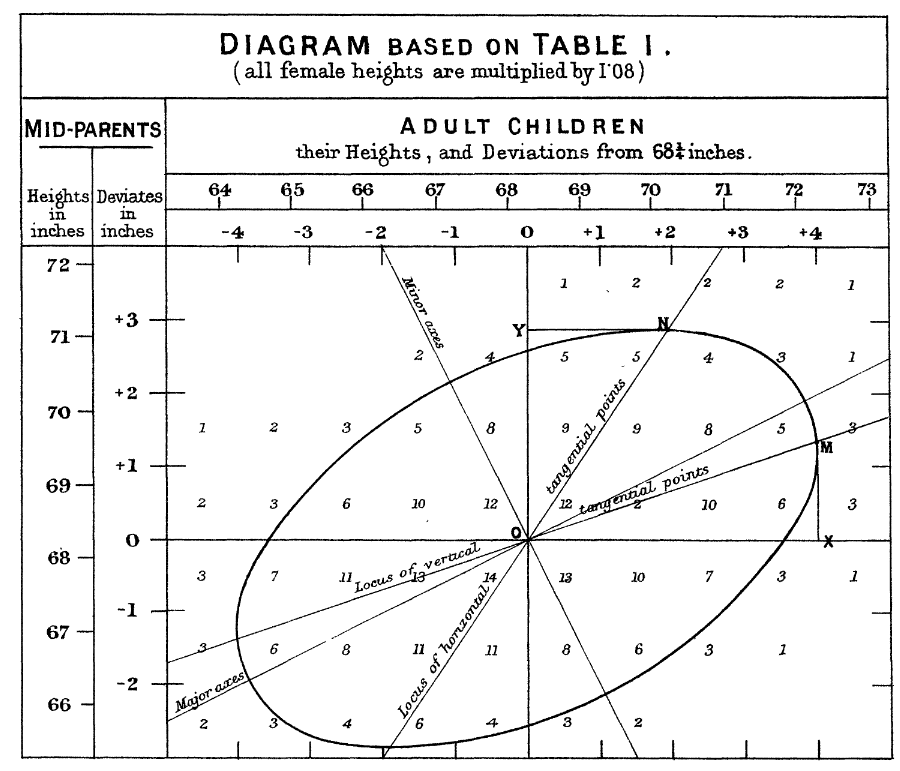


Although the motivation of regression analysis differs from hypothesis testing, their statistical approach shares similarities. Therefore, sometimes you can read (maybe not so funny) jokes like the follows ([source](https://twitter.com/MaartenvSmeden/status/1365036506751135746))
> T-test, ANOVA and linear regression walk into a bar. 
> 
> Barman asks: are you here alone or are you waiting for someone?

The similarity (in particular when applying regression with categorical independent variables) arises because ultimately we are trying to understand the **variance** fo these observations from all the methods. Regression analysis provides a flexible and consistent framework to partition the total variance (can be quantified as the total sum of squares or TSS in a target variable) into variance related with certain patterns (e.g. grouping in paired t-test and ANOVA, another variable in linear regression) and variance of residuals (e.g. residual sum of squares or RSS after removing the average linear relationship). 

The figure below ([source](https://github.com/Pakillo/LM-GLM-GLMM-intro/blob/trees/README.md)) show how modern regression tools have facilitated common statistical inference needs.


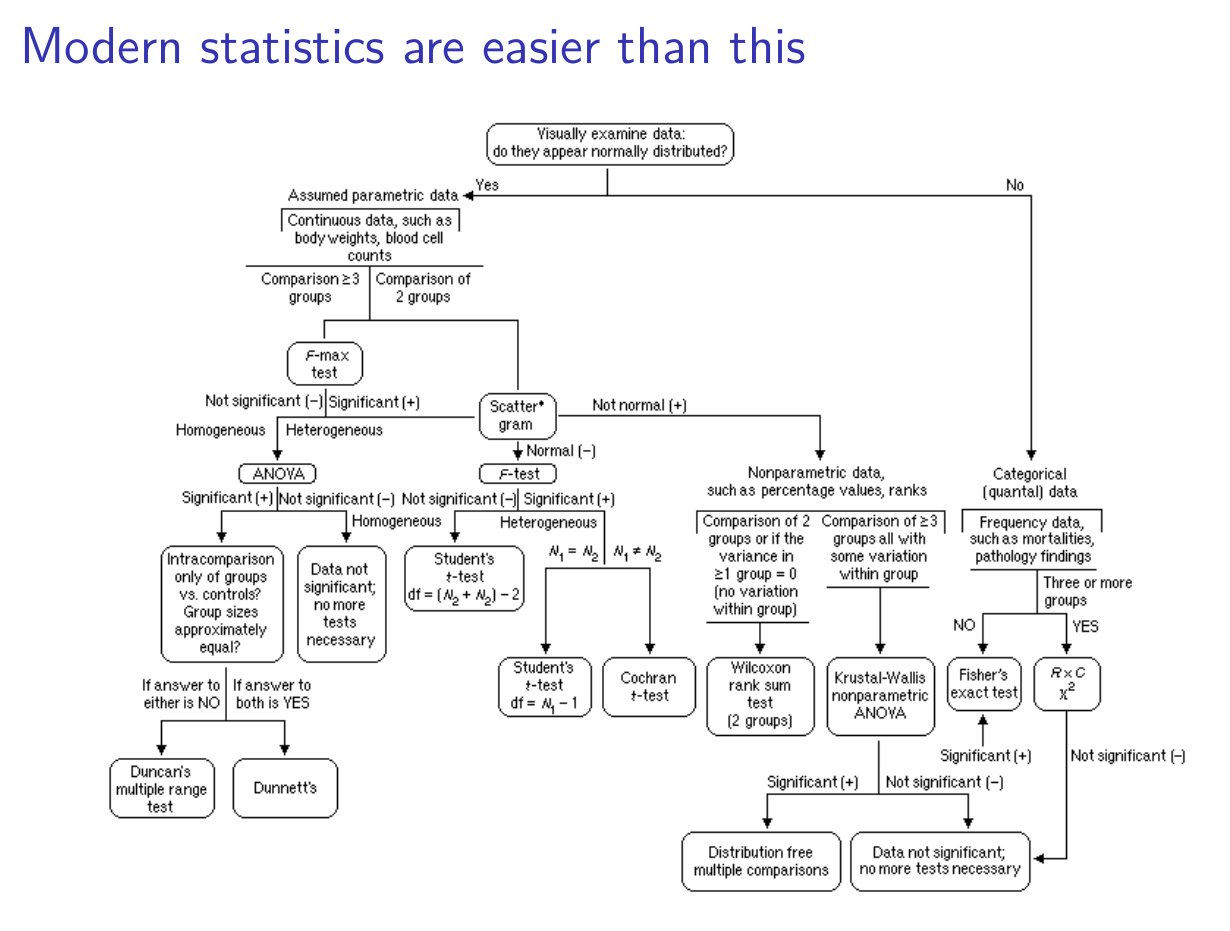

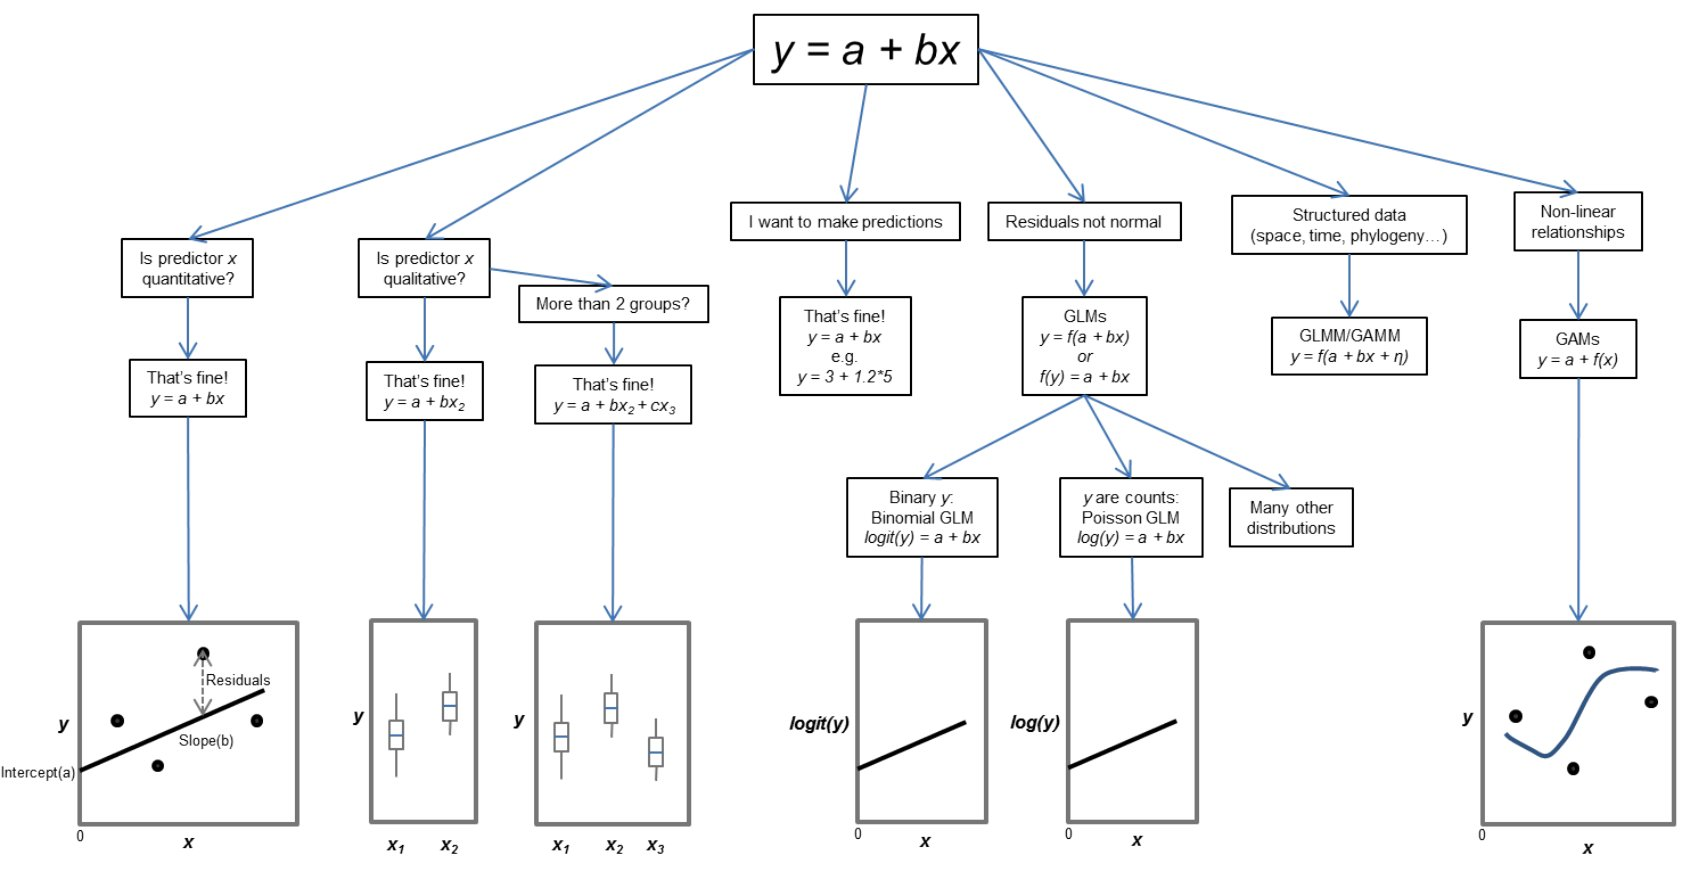



In the Regression section of this course, we will cover most of the common regression tools and some special types of regression that can come handy in ecological analyses. In this course, we will focus on the Simple Linear Regression to understand the basics of regression analysis.

---

#### 2. Simple Linear Regression

* Definition

The simplest version of the regression is when there is only one independent variable and the regression function is linear

$Y = \beta_0 + \beta_1X$, where $\beta_0$ and $\beta_1$ are called **regression coefficients** (intercept, and slope).

In the real world (i.e. our observations), the same value of X can give different values of Y. Hence an stochastic component (noise, random error) is added to the end of the equation:

$Y = \beta_0 + \beta_1X + \epsilon$. Here $\epsilon$ is often called as **residual** of the regression model.

Usually, we assume the **stochastic component to be normally distributed** with a zero mean and a fixed variance. Therefore, you can also see the regression written as $Y_i \sim N(\beta_1X_i+\beta_0,\sigma^2)$

* Parameter Estimation (Model Fitting)

There are *three* unknown parameters in the model, $\beta_0$, $\beta_1$, and $\sigma^2$. Given a set of paired observations of X and Y, we are primarily interested in the best estimates for $\beta_0$, $\beta_1$. So we need to find *estimators* for both of them ($\hat{\beta_0}$, $\hat{\beta_1}$).

A common approach to construct the estimators is the **least squares estimates**, which finds the values $\hat{\beta_0}$, $\hat{\beta_1}$ that minimize RSS = $\sum_{i=1}^{n}\hat{\epsilon_i}$, where $\hat{\epsilon_i} = Y_i - (\hat{\beta_0} + \hat{\beta_1}X_i)$. Mathematically, we need to calculate the partial derivaties of RSS with respect to $\hat{\beta_0}$ and $\hat{\beta_1}$, which should all be zero when RSS is minimal. Solving the equation system (check Ch. 11 in [How to be a quantitative ecologist](https://www.researchgate.net/publication/310239832_How_to_be_a_Quantitative_Ecologist_The_'A_to_R'_of_Green_Mathematics_and_Statistics) for details) will yield the following formulas:

$\hat{\beta_1} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}$ (covariance between X and Y over variance of X, think how this is related with correlatoin coefficient?)

$\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$

We can also get an unbiased estimate of $\sigma^2$ as $\hat{\sigma^2} = (\frac{1}{n-2})\sum_{i=1}^{n} \hat{\epsilon_{i}^{2}}$.

There are also parameteric estimates for the *standard error* of the two regression coefficients (formulas see Ch. 13 in [All of Statistics](https://www.stat.cmu.edu/~larry/all-of-statistics/)), which allows for hypothesis testing about whether the coefficients are significantly different from zero.

The results of such approach of model fitting is called **Ordinarly Least Squares (OLS)**. We will show later that there are alternative ways to construct the estimator under different assumptions and for different purposes.

* Prediction

The best-fit line from linear regression is often used to predict the expected value of the response variable Y given a new value of explanatory variable X. In this practice, we are either **interpolating** (if the prediction is carried out within the observed range of the explanatory variable) or **extrapolating** (outside the observed range) the observed data. The uncertainty of the predictions have several different sources, shown by the simple calculation for the variance of the predicted Y ($\hat{Y_*}$) below:

$Var(\hat{Y_*}) = Var(\hat{\beta_0}+\hat{\beta_1}X_*)) = Var(\hat{\beta_0}) + X_*^2Var(\hat{\beta_1}) + 2X_*Cov(\hat{\beta_0},\hat{\beta_1})$

We can see that the prediction variance depends on the uncertainty of the parameters, and the value of the new explanatory variable. In addition, it is also influenced by the variance of the error term. As a result, the confidence interval of predictions depends on the value of $X_*$. The actual formula can be found in *All of Statistics*.




* Assessment of the fitting and Assumptions of OLS model

Naturally, we will ask how good our best-fit lines are for simple linear regression models. A measure of the goodness of fit is provided by the **coefficient of determination**, which is the squared correlation between the observed and estimated response values - $r^2 = corr(Y,\hat{Y})$. Obviously, $r^2$ takes value between 0 and 1. Alternatively, $r^2$ can be interpreted as the **proportion of explained variance** - $r^2 = 1. - RSS / TSS$. Apparently, the higher $r^2$ is, the more variance in Y we can explain with X and the better our regression model is.

For each regression coefficient, we can also conduct a t-test to test whether they are significantly different from zero. We can conduct an overall F-test about the hypothesis that at least one $\beta$ is non-zero. In addition, we are particularly interested in $\beta_1$. If $\beta_1$ is not sigificantly different from zero, we can infer Y does not depend on X and as a result $r^2$ is usually low. Therefore, the p-value associated with $\beta_1$ is often reported together with $r^2$

The above derivation and interpreation of OLS models build on a few key assumptions as in the case of various parameteric tests we learned in previous lectures. If one or more assumptions are not satified, the model performance can decrease and cautions should be taken when interpreting the results.

1. *Linearity*. Most fundamentally, if X and Y has a nonlinear relationship, the model performance will be low and predictions from the model will have large biases. This assumption is usually visually tested by scatter plot between X and Y observations. We can develop more quantitative assessment against alternative model formulations when we talk about Model Selection in the future.

2. *Normality* of **residuals**. This can be examined using the Q-Q plot of the residuals and Shaprio-Wilk test. If the residuals are obviously non-normal, then generalized linear models (GLMs) can usually help.

3. *Homoscedasticity*. This denotes the assumption of equal variance across all X values (in contrast, heteroscedasticity). The assumption can be examined by inspecting a plot of the residuals against fitted values (Y). There are also more formal statistical tests (e.g. White Test, etc.). If the model suffers from heteroscedasticity (e.g. error variance increases with X/Y), there are other extensions to explicitly model changes in the variance jointly with the mean.

4. *Outliers*. Sometimes, errors in data collection can lead to extreme outliers from the true relationship. These outliers can have **disproportionate effect** on the OLS parameters, especially in limited sampling (why?). Cook's distance is a metric to measure the effect (the rule of thumb is that Cook's distance values exeeding 1 suggesting big impact). There are also regression tools that are more robust to outliers (Robust Linear Regression), we will talk about a few later.

5. *Independence*. The observations should be independent from each other. This assumption can be violated for spatial and/or temporal samplings where spatial and temporal autocorrelation (i.e. one sampling is correlated with the next sampling close in space or time). Autoregresive models can help to capture some of the effects.

* Example and Interpretation of Regression Results

Here, we will use the BAAD data base to show how to conduct simple linear regression analysis and interpret the results in python (similar in R)


In [ ]:
# import packages and read the data

import pandas as pd
import numpy as np


baad_data_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_data.csv'
baad_dictionary_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_dictionary.csv'

df_data = pd.read_csv(baad_data_url, encoding='latin_1') # can also read local files
df_dict = pd.read_csv(baad_dictionary_url, encoding='latin_1')

# we will consider the relationship between Tree Diameter (d.bh) and Tree Height (h.t)
# first clean the data to only include valid data entries

data_mask = ~np.isnan(df_data['d.bh']) & ~np.isnan(df_data['h.t'])

df_d2h = df_data[data_mask]

# rename columns to avoid mis-interpreation for formula-based regressions
df_d2h.rename(columns={'d.bh' : 'dbh','h.t' : 'h'},inplace=True)

In [ ]:
# visualize the data

import matplotlib.pyplot as plt
%matplotlib inline

df_d2h.plot.scatter(x='dbh',y='h')

# how about in log space
df_d2h.plot.scatter(x='dbh',y='h',loglog=True)

# for simplicity we will randomly sample 200 data points to conduct regression
df_sub = df_d2h.sample(200)


In [ ]:
# use statsmodels package which offers regression tools in R-style

# first show one way to conduct regression using R-style formula strings and pandas df
import statsmodels.formula.api as smf #StatsModel Formulat api

import statsmodels.api as sm


# construct an ols model for the linear relationship between raw h.t and d.bh
d2h_model = smf.ols('h ~ dbh',data=df_sub) # note that here ols should be in smaller case

# get model fitting results
res = d2h_model.fit()

# print a summary table of the regression
print(res.summary())

In [ ]:
# get the parameters and overlay it to scatter plot
# all attributes of the regression results can be found at
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults

coef = res.params # coef[0] is intercept, coef[1] is slope
coef_int = res.conf_int()
p = res.f_pvalue # p value to check whether at least one beta is different from zero
# for simple lienar regression, this p is the same as the t-test p value for beta_1

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

df_sub.plot.scatter(x='dbh',y='h',s=20,alpha=0.8,edgecolor=None,ax=ax)

# over lay regression lines
plot_x = np.linspace(df_sub['dbh'].min(), df_sub['dbh'].max(),100)
plot_y = res.get_prediction({'dbh':plot_x}).predicted_mean
plot_y_ci = res.get_prediction({'dbh':plot_x}).conf_int()

# get prediction interval

if p < 0.05:
    ls = '-'
else:
    # not significant
    ls = '--'
    
ax.plot(plot_x,plot_y,'r',ls=ls,lw=2.)
ax.plot(plot_x,plot_y_ci,'r:',lw=1.)


# add the formula and r-squared
reg_str = f'h = {coef[1]:4.2f}dbh + {coef[0]:4.2f}, r2 = {res.rsquared:4.2f}'
ax.set_title(reg_str)


In [ ]:
# get residual and test assumption
epsilon = res.resid

# qq plot
fig = sm.qqplot(epsilon, line='s')
plt.show()

# normality test
from scipy.stats import shapiro

print(shapiro(epsilon))

# plot residual vs predicted h
pred_h = res.predict()

fig = plt.figure()
plt.plot(pred_h,epsilon,'ko')

# plot residual against fitted values
fig = plt.figure()
cd = res.get_influence().cooks_distance
plt.plot(cd[0],'ro')

In [ ]:
# alternatively, you can call plot_regress_exog
fig = plt.figure()
sm.graphics.plot_regress_exog(res, 'dbh', fig=fig)
fig.tight_layout()

In [ ]:
# re-do the regression in log-space

log_model = smf.ols('np.log(h) ~ np.log(dbh)',data=df_sub) # note that here ols should be in smaller case

# get model fitting results
log_res = log_model.fit()

# print a summary table of the regression
print(log_res.summary())

In [ ]:
# get residual and test assumption
epsilon = log_res.resid

# qq plot
fig = sm.qqplot(epsilon, line='s')
plt.show()

# normality test
from scipy.stats import shapiro

print(shapiro(epsilon))

# plot residual vs predicted Y
fig = plt.figure()
pred_y = res.predict() # in-sample prediction
plt.plot(np.log(pred_y),epsilon,'ko')

# plot residual against fitted values
fig = plt.figure()
cd = res.get_influence().cooks_distance
plt.plot(cd[0],'ro')

In [ ]:
# Misc
# regression without R-style formula

# note here I use sm instead of smf, and OLS is in upper-case
res = sm.OLS(df_sub['h'],df_sub['dbh']) # no intercept or force intercept to be zero
res = sm.OLS(df_sub['h'],sm.add_constant(df_sub['dbh'])) # has intercept, the same as h ~ dbh

#### 3. Special cases for linear regressions

3.1 Categorical variable as explanatory variable

This is more common for multiple regression models, which we will talk about later. Here, we consider a simple case of a single categorical variable that has only two values (True/False). Then the regression is equivalent to a t-test.

We will use regression to check whether trees in Tropical rain forests which generally are more light limited are *slimmer* than trees in Savannas.


In [ ]:
# ratio of height to dbh, larger values mean slimmer trees
df_d2h['h2d_ratio'] = df_d2h['h'] / df_d2h['dbh'] 

df_sub = df_d2h[df_d2h['vegetation'].isin(['TropRF','Sav'])]

df_sub.boxplot('h2d_ratio',by=['vegetation'])

In [ ]:
# let's do a t-test first
from scipy.stats import ttest_ind, ranksums, shapiro

# test whether the data is normally distributed
h2d_trf = df_sub[df_sub['vegetation']=='TropRF']['h2d_ratio']
h2d_sav = df_sub[df_sub['vegetation']=='Sav']['h2d_ratio']
print(shapiro(h2d_trf))
print(shapiro(h2d_sav))

# not normal, try log transformation
print(shapiro(np.log(h2d_trf)))
print(shapiro(np.log(h2d_sav)))

# log transformation helps to improve normality but still non-normal

# do both t-test and wilkoxon
print('t-test:')
print(ttest_ind(np.log(h2d_trf),np.log(h2d_sav)))

print('rank sum:')
print(ranksums(np.log(h2d_trf),np.log(h2d_sav)))

# their mean values are significantly different
print(f'diff is ~ {np.mean(np.log(h2d_trf)) - np.mean(np.log(h2d_sav))}')

In [ ]:
# use regression instead

res = smf.ols('np.log(h2d_ratio) ~ C(vegetation)',data=df_sub).fit()
print(res.summary())

3.2 Type II linear regression

For the same set of observations X and Y, consider

$Y = \beta_0 + \beta_1X$

$X = \alpha_0 + \alpha_1Y$

Will $\alpha_1 * \beta_1$ equals 1? If we got $Y_*$ from $X_*$ from the first regression, can we get the same $X_*$ from the $Y_*$ using the second equation?

In [ ]:
# let's use the height and dbh allometry again
df_sub = df_d2h.sample(200)

res_y = smf.ols('np.log(h) ~ np.log(dbh)',data=df_sub).fit()
print(res_y.summary())
res_x = smf.ols('np.log(dbh) ~ np.log(h)',data=df_sub).fit()
print(res_x.summary())

print(f'product of two slopes: {res_y.params[1] * res_x.params[1]:4.2f}' )

x_star = 1.
print(f'let x_star = {x_star}')
y_star = res_y.params[0] + res_y.params[1] * x_star
print(f'y_star = {y_star}')

x_star_2 = res_x.params[0] + res_x.params[1] * y_star
print(f'x_star_2 = {x_star_2}')


The reason why the product of the two slopes is not zero is because we assume all the errors are attributed to Y in the first regression while all the errors are attributed to X in the second one. However, there are cases we need to consider errors under both variables:

(1) X and Y observations have comparable magnitude of errors 

think about two scenarios: a. we want to predict plant biomass from plant height VS b. we want to understand the temporal trend of surface temperature and predict future temperature values. Which one has comparable magnitude of errors?

(2) We are more interested in the scaling between X and Y (i.e. sometimes we calculate Y from X, sometimes X from Y) instead of just predicting Y from X. 

e.g. scaling between different traits in functional ecology

To reconcile the assymmetry of the results, we can use Type II regression (also known as geometric regression, major axis analysis, etc.). From a geometric viewpoint, the OLS regression minimizes the vertical distance of each data points to the regression line while the Type II regression minimizes the perpendicular distance of each data point to the regression line. Reading more [here](https://cran.r-project.org/web/packages/lmodel2/vignettes/mod2user.pdf)

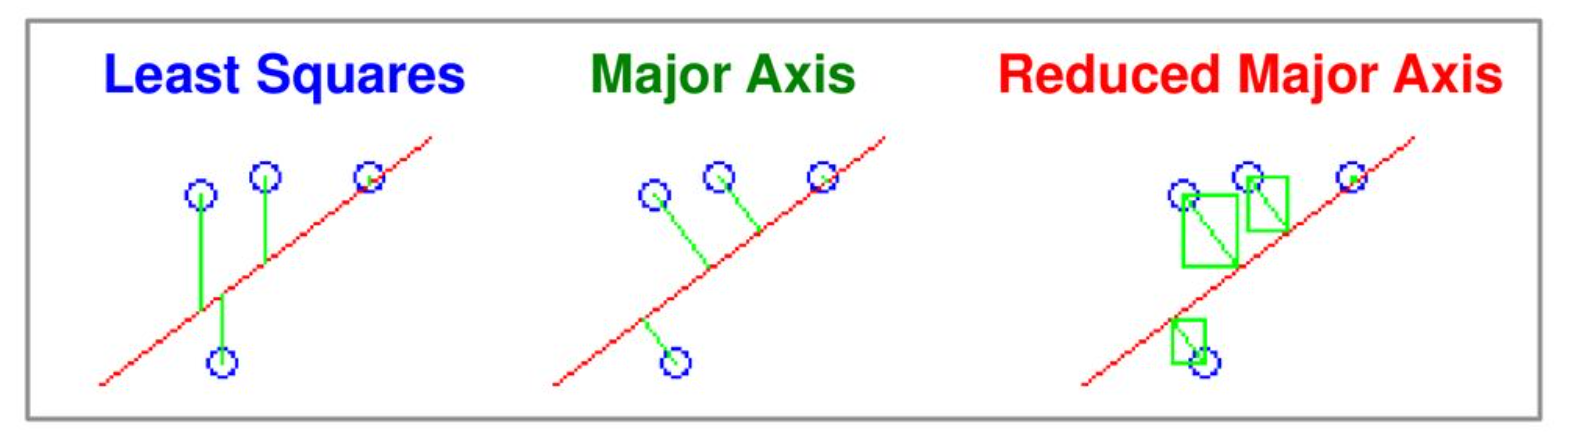



In [ ]:
from pylr2 import regress2

results_yx = regress2(np.log(df_sub['dbh']),np.log(df_sub['h']))

print(results_yx)

results_xy = regress2(np.log(df_sub['h']),np.log(df_sub['dbh']))
print(results_xy)
print(results_yx['slope'] * results_xy['slope'])

3.3 Theil-Sen Estimator, a robust linear regression model

It is not uncommon that one or several assumptions for OLS regressions are not met in real-world data. Due to limitations in sampling and errors during the measurements, the data could have outliers and residuals can deviate away from normality and are heteroscedastic. This does not necessarily mean that we can't infer anything from your results. One approach is to examine your data and exclude some obviously problematic observations (with good justifications). In addition, other non-parametric methods have been developed to help us get more robust results even when the data is messy.

Theil-Sen Estimator (or Sen's/Theil's slope) is a popular technique to get a linear model, which can be more accurate than a non-robust simple linear regression model. It basically calculates the median of the slope between any two points from the data sets (or sub-set of the whole data set if the number of observations are huge). It is **insenstive to outliers**.


In [ ]:
# theilslope from scipy
from scipy.stats.mstats import theilslopes

# Let's use the same sub-set data in type II regression
# we can add a few outliers as well
df_ts = df_sub.copy()

df_ts = df_ts.append(pd.DataFrame({'dbh':np.random.rand(15)*0.001 + 0.001,'h':np.random.rand(15) * 70 + 30}),ignore_index=True)

df_ts.plot.scatter(x='dbh',y='h',loglog=True)
# highlight the outliers
plt.scatter(df_ts['dbh'][-15::],df_ts['h'][-15::],c='r')

In [ ]:
# first do an OLS regression and a type II regression
res_ols = smf.ols('np.log(h) ~ np.log(dbh)',data=df_ts).fit()
res_ols_org = smf.ols('np.log(h) ~ np.log(dbh)',data=df_sub).fit() # no outliers
res_rma = regress2(np.log(df_ts['dbh']),np.log(df_ts['h']),_method_type_2="reduced major axis")
res_ts = theilslopes(np.log(df_ts['h']),np.log(df_ts['dbh']),0.95)

# plot the four lines

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(np.log(df_ts['dbh']),np.log(df_ts['h']),10,c='r',label='Outlier')
ax.scatter(np.log(df_sub['dbh']),np.log(df_sub['h']),10,c='b',label='Original')

# four lines
plot_x = np.linspace(np.log(df_ts['dbh'].min()),np.log(df_ts['dbh'].max()),100)

# ols org
y_ols_org = res_ols_org.params[0] + res_ols_org.params[1] * plot_x
# ols
y_ols = res_ols.params[0] + res_ols.params[1] * plot_x
# rma
y_rma = res_rma['intercept'] + res_rma['slope'] * plot_x
# ts
y_ts = res_ts[1] + res_ts[0] * plot_x

ax.plot(plot_x,y_ols_org,'k--',label='OLS org')
ax.plot(plot_x,y_ols,'k-',label='OLS')
ax.plot(plot_x,y_rma,'g-',label='RMA')
ax.plot(plot_x,y_ts,'r-',label='Theil-Sen')

plt.legend(loc='lower right')


3.4 Weighted Least Squares

In some cases, the observations may come with weight. For example, in meta-analysis, results from studies with larger sample size might be more trustworthy than studies with smaller sample size. Or, we would like to favor certain observations because we are mostly interested in predictions around these observations. We can use weighted least squares for the regression, which adds a weight when minimizing the RSS.

Here we show an example of weighting the dbh-h observations with basal area (dbh^2), since we are more interested in predictions for big trees.



In [ ]:
# compare ols and wls

dbh = np.log(df_sub['dbh'].values)
h = np.log(df_sub['h'].values)
weights = np.exp(dbh) ** 2

res_ols = sm.OLS(h,sm.add_constant(dbh)).fit()
res_wls = sm.WLS(h,sm.add_constant(dbh),weights=weights).fit()

print(res_ols.summary())
print(res_wls.summary())

In [ ]:
# plot the results

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(dbh,h,s=weights*20.,c='b') # show weights

# four lines
plot_x = np.linspace(np.amin(dbh),np.amax(dbh),100)


# ols
y_ols = res_ols.params[0] + res_ols.params[1] * plot_x
# wls
y_wls = res_wls.params[0] + res_wls.params[1] * plot_x


ax.plot(plot_x,y_ols,'k-',label='OLS')
ax.plot(plot_x,y_wls,'g-',label='WLS')

plt.legend(loc='lower right')


Summary/Discussion:

If we are interested in doing a simple linear regression, what are the procedures we should take after getting the data?